# 프로젝트 주제 : 서울시 아파트 가격 예측

* 서울특별시 부동산 실거래가 정보
    - http://data.seoul.go.kr/dataList/OA-15548/S/1/datasetView.do

  ![image.png](attachment:image.png)   

```
프로젝트 목적 : 서울시에서 제공하는 최근 10년간의 실거래 데이터를 가지고 2020, 2021년 집 값을 예측하는 프로젝트
```
```
2020년 서울에 부동산 시장은 정부의 규제와 투기 등 여러가지 요인으로 인해 변동성이 컸습니다. 물론 이 데이터 만으로 집 값을 정확하게 예측 하는 것은 불가능합니다. 앞서 말한 정뷰의 규제와 같이 예상하지 못한 일도 나타날 수 있기 때문입니다. 그러므로 이런 정부 규제나 외적인 부분이 영향을 주는 것은 배제하고 프로젝트를 진행 할 것입니다.

집값을 결정하는 특성들은 여러가지가 있습니다. 흔히 말하는 역세권으로 지하철역에 가까운경우 아파트 시세가 올라가거나, 건물이 최신에 지어 졌는지에 따라서도 아파트 가격에 영향을 미칠 것입니다. 이와 같이 많은 이유가 있을텐데 집 값의 영향을 미치는 것이 무엇인지도 파악 해볼 것입니다.

또한 서울시에 자치구 별, 년도 별로 집값이 어떻게 변화를 했는지도 알아 볼 예정입니다.

우리가 예측 하려는 특징과 목표를 모두 가지고 있기 때문에 supervised 러닝을 할 것이다. 또한 target인 집값이 연속적이기 때문에 회귀 모델로 만들 것입니다.

```

## 2020, 2021년의 집 값을 얼마나 잘 예측 할 것인가?

## 서울시 아파트 값의 영향을 미치는 특성은 무엇인가?

# EDA 데이터 탐색


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')
plt.rc('axes', unicode_minus=False)


In [ ]:
raw_df_2019 = pd.read_csv('./서울특별시 부동산 실거래가 정보.csv', low_memory= False, encoding="cp949")

raw_df_2019.head()

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건물명,건축년도
0,11305-2021-4-0000633-1,1130510200102420000,11305,강북구,1130510200,번동,2021,4,신고,1,NaN,49.94,0,7.0,2001,아파트,563000000,주공1단지,1991.0
1,11110-2021-4-0000400-1,1111018300102930001,11110,종로구,1111018300,평창동,2021,4,신고,1,54.22,76.56,0,1.0,2002,연립주택,360000000,천지인,2003.0
2,11305-2021-4-0000907-1,1130510100,11305,강북구,1130510100,미아동,2021,4,신고,1,109.00,170.97,0,NaN,1001,단독주택,405000000,NaN,1991.0
3,11410-2021-4-0001112-1,1141011000,11410,서대문구,1141011000,북아현동,2021,4,신고,1,66.00,118.80,0,NaN,1001,단독주택,1272220000,NaN,1992.0
4,11305-2021-4-0000824-1,1130510100102280024,11305,강북구,1130510100,미아동,2021,4,신고,1,25.32,49.22,0,4.0,2002,연립주택,180000000,현대아트빌라,1995.0


In [ ]:
raw_df_2019.shape

(2282346, 19)

In [ ]:
train = raw_df_2019[(raw_df_2019['신고년도'] < 2020) & (raw_df_2019['신고년도'] > 2009)]

test = raw_df_2019[(raw_df_2019['신고년도'] >= 2020)]

train.shape, test.shape

((1441702, 19), (196705, 19))

**컬럼 이름이 한글이므로 영어로 변경**

In [ ]:
train = train.rename({'실거래가아이디': 'RTMS_ID','지번코드': 'LAND_CD', '시군구코드':'SGG_CD', '자치구명':'SGG_NM',
                       '법정동코드':'BJDONG10_CD', '법정동명': 'BJDONG_NM', '신고년도': 'ACC_YEAR', '업무구분코드':'JOB_GBN',
                        '업무구분' : 'JOB_GBN_NM', '물건번호':'OBJ_SEQNO','대지권면적':'TOT_AREA','건물면적':'BLDG_AREA',
                       '관리구분코드':'RIGHT_GBN','층정보':'FLR_INFO', '건물주용도코드':'BLDG_MUSE_CD', '건물주용도':'BLDG_MUSE_NM','물건금액' : 'OBJ_AMT',
                       '건축년도':'BUILD_YEAR', '건물명':'BLDG_NM'}, axis='columns')

test = test.rename({'실거래가아이디': 'RTMS_ID','지번코드': 'LAND_CD', '시군구코드':'SGG_CD', '자치구명':'SGG_NM',
                       '법정동코드':'BJDONG10_CD', '법정동명': 'BJDONG_NM', '신고년도': 'ACC_YEAR', '업무구분코드':'JOB_GBN',
                        '업무구분' : 'JOB_GBN_NM', '물건번호':'OBJ_SEQNO','대지권면적':'TOT_AREA','건물면적':'BLDG_AREA',
                       '관리구분코드':'RIGHT_GBN','층정보':'FLR_INFO', '건물주용도코드':'BLDG_MUSE_CD', '건물주용도':'BLDG_MUSE_NM','물건금액' : 'OBJ_AMT',
                       '건축년도':'BUILD_YEAR', '건물명':'BLDG_NM'}, axis='columns')

In [ ]:
# 검증 셋의 경우 2020 데이터 검증 셋으로 설정
val = train[train['ACC_YEAR'] >= 2019]
train = train[train['ACC_YEAR'] < 2019]

In [ ]:
train.shape, val.shape, test.shape

((1311440, 19), (130262, 19), (196705, 19))

In [ ]:
train.head()

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR
326967,11380-2018-4-0010781-1,1138010400104460011,11380,은평구,1138010400,갈현동,2018,4,신고,1,23.61,31.06,0,1.0,2002,연립주택,80000000,(446-11),1987.0
326968,11545-2018-4-0005964-1,1154510200103800014,11545,금천구,1154510200,독산동,2018,4,신고,1,28.67,48.54,0,3.0,2002,연립주택,180000000,금호타운(380-14),2001.0
326969,11380-2018-4-0010780-1,1138010200101410111,11380,은평구,1138010200,녹번동,2018,4,신고,1,21.22,31.56,0,-1.0,2002,연립주택,67000000,신진빌라(141-111),1991.0
326970,11230-2018-4-0009724-1,1123010600103360000,11230,동대문구,1123010600,장안동,2018,4,신고,1,NaN,84.87,0,11.0,2001,아파트,600000000,장안현대홈타운(336),2003.0
326971,11380-2018-4-0010779-1,1138010300102300003,11380,은평구,1138010300,불광동,2018,4,신고,1,NaN,56.40,0,8.0,2001,아파트,285900000,대암아파트,1997.0


'RTMS_ID(실거래가아이디)'가 SGG_CD(시군구코드) + ACC_YEAR(신고년도) + JOB_GBN(업무구분코드) + 고유번호의 조합으로 되어 있습니다.

LAND_CD(지번코드)의 앞 10자리는 BJDONG10_CD 가 포함되어 있습니다.

BJDONG10_CD(법정동코드) 는 SGG_CD(시군구코드) + 해당 동 코드 고유 번호

In [ ]:
train.describe()

,SGG_CD,BJDONG10_CD,ACC_YEAR,JOB_GBN,OBJ_SEQNO,TOT_AREA,BLDG_AREA,FLR_INFO,BLDG_MUSE_CD,OBJ_AMT,BUILD_YEAR
count,1.311440e+06,1.311440e+06,1.311440e+06,1.311440e+06,1.311440e+06,5.995220e+05,1.311440e+06,1.205677e+06,1.311440e+06,1.311440e+06,1.307573e+06
mean,1.145210e+04,1.145222e+09,2.014670e+03,4.086028e+00,1.315484e+00,3.041929e+03,7.619630e+01,7.100971e+00,2.802096e+03,4.376161e+08,1.932678e+03
std,1.741543e+02,1.741492e+07,2.428373e+00,6.501826e-01,3.270288e+00,1.157522e+06,5.530150e+01,5.935992e+00,3.192761e+03,3.879380e+08,3.570130e+02
min,1.111000e+04,1.111010e+09,2.010000e+03,4.000000e+00,0.000000e+00,0.000000e+00,3.310000e+00,-4.000000e+00,1.001000e+03,3.500000e+06,0.000000e+00
25%,1.130500e+04,1.130510e+09,2.013000e+03,4.000000e+00,1.000000e+00,2.321000e+01,4.794000e+01,3.000000e+00,2.001000e+03,2.090000e+08,1.991000e+03
50%,1.144000e+04,1.144013e+09,2.015000e+03,4.000000e+00,1.000000e+00,3.246000e+01,6.096000e+01,5.000000e+00,2.001000e+03,3.350000e+08,2.000000e+03
75%,1.159000e+04,1.159011e+09,2.017000e+03,4.000000e+00,1.000000e+00,5.534000e+01,8.494000e+01,1.000000e+01,2.002000e+03,5.350000e+08,2.006000e+03
max,1.174000e+04,1.174011e+09,2.018000e+03,9.000000e+00,2.490000e+02,4.481289e+08,3.619840e+03,9.000000e+01,1.420200e+04,2.917370e+10,2.019000e+03


위에 데이터를 보면 **대지권면적, 건축년도 0.0**은 기입을 안한 결측치로 판단, 층 정보의 최소값이 -4인 값도 있다. 지하층이 있을 수도 있다는 추측을 해볼 수 있습니다.

## 서울시가 제공하는 특성들은 서로 얼마나 연관이 되어 있을까?

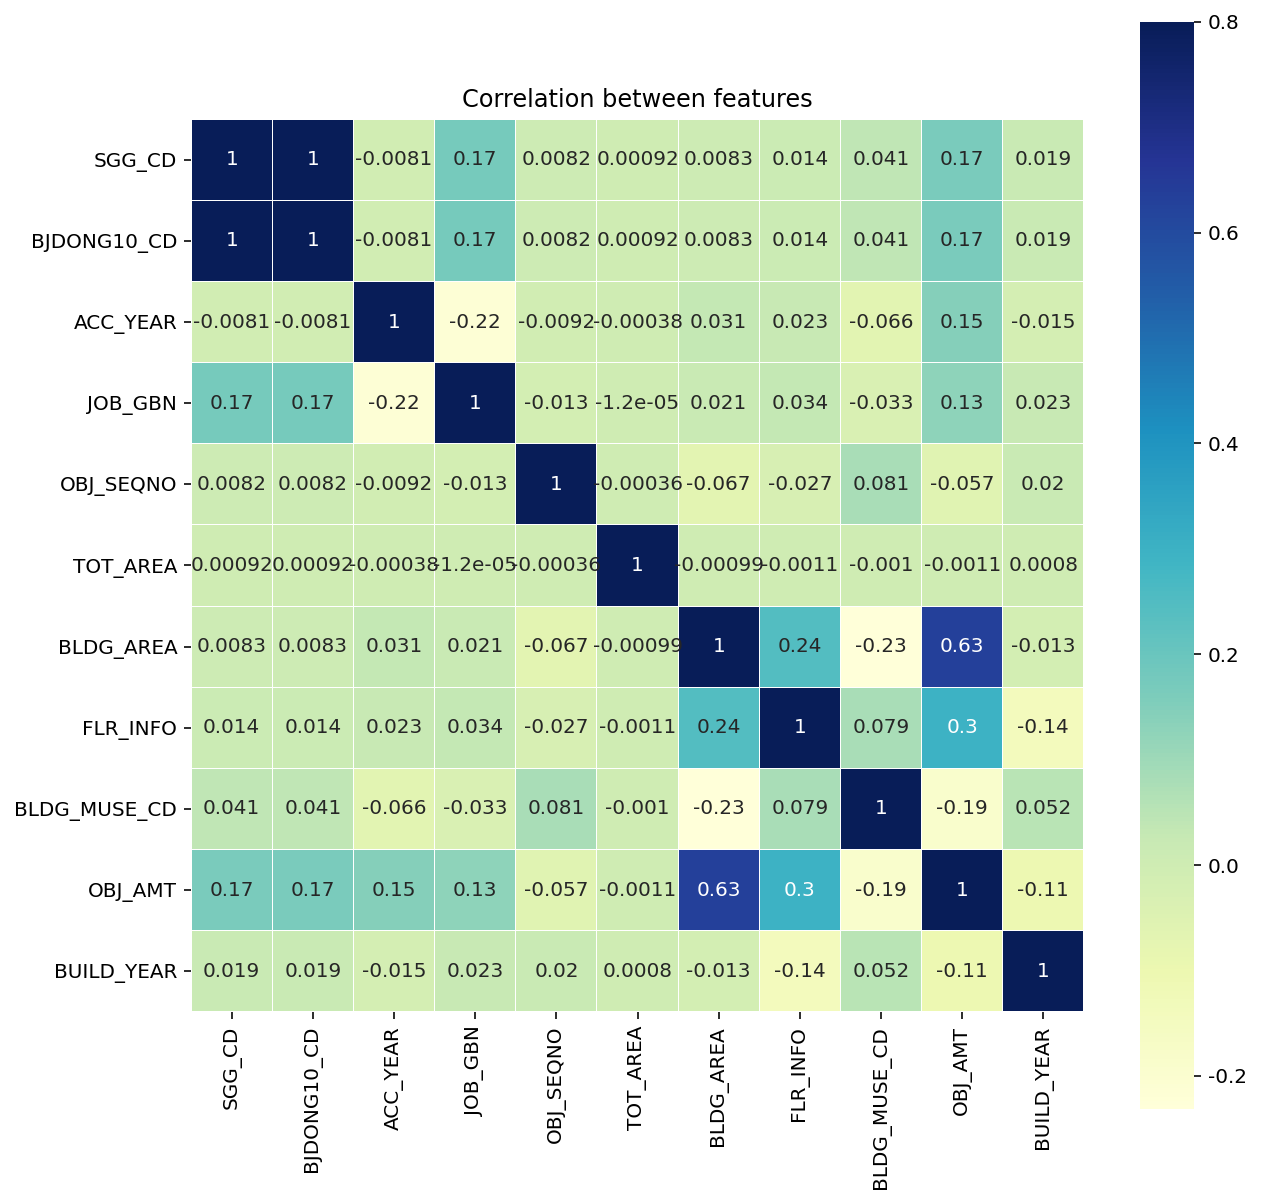

In [ ]:
corr=train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

OBJ_AMT(집 값)과의 연관성이 가장큰 Feature는 BLDG_AREA와 연관이 높은 것을 볼 수 있습니다. 회귀문제에서 다중공산성을 잘 처리하는 것이 중요한데 Feature Engeneering을 통해 관련 특성들을 제거 해야 한다.

*다중공산성 : 독립변수들 간에 강한 상관관계가 나타나는 문제*

In [ ]:
train['SGDONG_NM'] = train[['SGG_NM', 'BJDONG_NM']].apply(lambda x: ' '.join(x), axis=1)
val['SGDONG_NM'] = val[['SGG_NM', 'BJDONG_NM']].apply(lambda x: ' '.join(x), axis=1)
test['SGDONG_NM'] = test[['SGG_NM', 'BJDONG_NM']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
train.head()

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR,SGDONG_NM
326967,11380-2018-4-0010781-1,1138010400104460011,11380,은평구,1138010400,갈현동,2018,4,신고,1,23.61,31.06,0,1.0,2002,연립주택,80000000,(446-11),1987.0,은평구 갈현동
326968,11545-2018-4-0005964-1,1154510200103800014,11545,금천구,1154510200,독산동,2018,4,신고,1,28.67,48.54,0,3.0,2002,연립주택,180000000,금호타운(380-14),2001.0,금천구 독산동
326969,11380-2018-4-0010780-1,1138010200101410111,11380,은평구,1138010200,녹번동,2018,4,신고,1,21.22,31.56,0,-1.0,2002,연립주택,67000000,신진빌라(141-111),1991.0,은평구 녹번동
326970,11230-2018-4-0009724-1,1123010600103360000,11230,동대문구,1123010600,장안동,2018,4,신고,1,NaN,84.87,0,11.0,2001,아파트,600000000,장안현대홈타운(336),2003.0,동대문구 장안동
326971,11380-2018-4-0010779-1,1138010300102300003,11380,은평구,1138010300,불광동,2018,4,신고,1,NaN,56.40,0,8.0,2001,아파트,285900000,대암아파트,1997.0,은평구 불광동


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings(action='ignore') 


%matplotlib inline

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

범주형의 카디널리티를 확인

In [ ]:
train.nunique()

RTMS_ID         1311440
LAND_CD           81428
SGG_CD               25
SGG_NM               25
BJDONG10_CD         429
BJDONG_NM           427
ACC_YEAR              9
JOB_GBN               2
JOB_GBN_NM            2
OBJ_SEQNO           221
TOT_AREA          13733
BLDG_AREA         34383
RIGHT_GBN             5
FLR_INFO             79
BLDG_MUSE_CD          4
BLDG_MUSE_NM          4
OBJ_AMT           34125
BLDG_NM           62479
BUILD_YEAR          113
SGDONG_NM           429
dtype: int64

In [ ]:
[(x, train[x].unique()) for x in train.columns if train[x].dtypes == object]

[('RTMS_ID',
  array(['11380-2018-4-0010781-1', '11545-2018-4-0005964-1',
         '11380-2018-4-0010780-1', ..., '11470-2010-4-0002609-1',
         '11470-2010-4-0002607-1', '11470-2010-4-0002610-1'], dtype=object)),
 ('LAND_CD',
  array(['1138010400104460011', '1154510200103800014',
         '1138010200101410111', ..., '1147010200105570049',
         '1147010100101280096', '1147010300101400014'], dtype=object)),
 ('SGG_NM',
  array(['은평구', '금천구', '동대문구', '동작구', '강서구', '송파구', '강남구', '광진구', '서초구',
         '중구', '중랑구', '종로구', '구로구', '관악구', '용산구', '성동구', '도봉구', '노원구',
         '강동구', '성북구', '양천구', '영등포구', '마포구', '강북구', '서대문구'], dtype=object)),
 ('BJDONG_NM',
  array(['갈현동', '독산동', '녹번동', '장안동', '불광동', '흑석동', '수색동', '제기동', '대조동',
         '휘경동', '사당동', '진관동', '청량리동', '상도동', '응암동', '용두동', '등촌동', '대방동',
         '신사동', '답십리동', '역촌동', '증산동', '오금동', '이문동', '전농동', '청담동', '자양동',
         '화곡동', '서초동', '세곡동', '방화동', '방배동', '역삼동', '광장동', '염창동', '양재동',
         '구산동', '구의동', '도곡동', '내발산동', '삼성동',

* 높은 카디널리티 는 값이 매우 드물거나 고유 한 열을 나타냅니다. 대부분의 시계열 데이터 세트에 높은 카디널리티 데이터가 얼마나 많이 포함되어 있는지를 감안할 때 향후 모델을 혼동하지 않도록 데이터 세트에서 이러한 높은 카디널리티 열을 완전히 제거하여이 문제를 직접 해결할 것입니다.

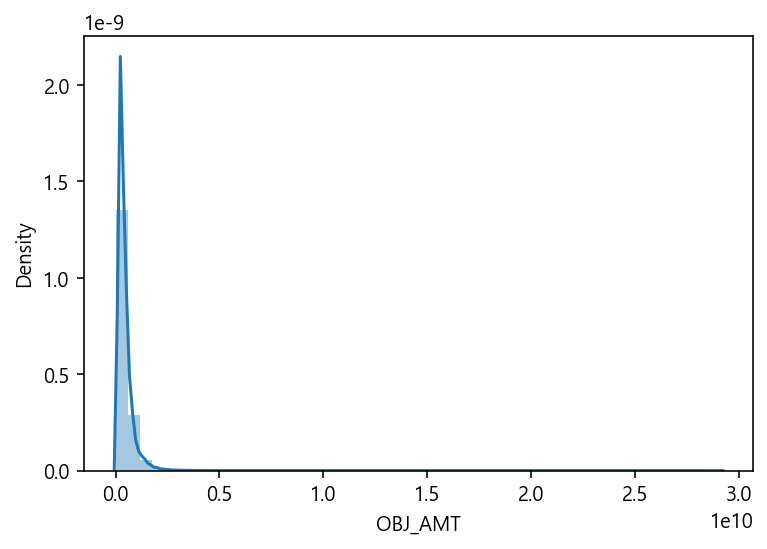

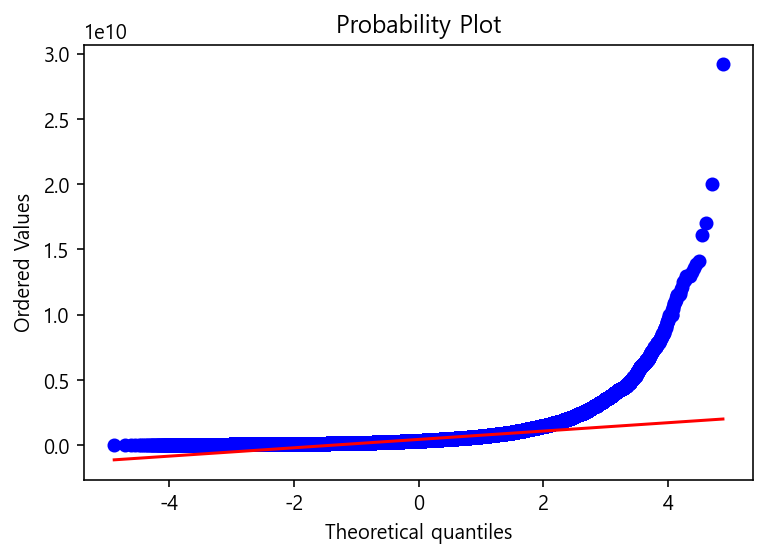

In [ ]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(train['OBJ_AMT'], hist=True);
fig = plt.figure()
res = stats.probplot(train['OBJ_AMT'], plot=plt)

타겟인 집값의 분포도 이상치도 존재하고 왼쪽으로 치우쳐져 있다.

In [ ]:
train[train['BLDG_MUSE_NM']== '아파트'].head()

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR,SGDONG_NM
326970,11230-2018-4-0009724-1,1123010600103360000,11230,동대문구,1123010600,장안동,2018,4,신고,1,NaN,84.87,0,11.0,2001,아파트,600000000,장안현대홈타운(336),2003.0,동대문구 장안동
326971,11380-2018-4-0010779-1,1138010300102300003,11380,은평구,1138010300,불광동,2018,4,신고,1,NaN,56.40,0,8.0,2001,아파트,285900000,대암아파트,1997.0,은평구 불광동
326978,11230-2018-4-0009727-1,1123010900101280012,11230,동대문구,1123010900,휘경동,2018,4,신고,1,0.0,84.31,1,5.0,2001,아파트,709700000,휘경 SK VIEW,0.0,동대문구 휘경동
326980,11590-2018-4-0011173-1,1159010700111340000,11590,동작구,1159010700,사당동,2018,4,신고,1,NaN,84.98,0,14.0,2001,아파트,589000000,경남아너스빌1차,1997.0,동작구 사당동
326981,11380-2018-4-0010770-1,1138011400100270000,11380,은평구,1138011400,진관동,2018,4,신고,1,0.0,166.19,A,4.0,2001,아파트,681740000,은평뉴타운 구파발(금호어울림10단지),0.0,은평구 진관동


In [ ]:
train['JOB_GBN_NM'].value_counts()

신고        1288876
주택거래신고      22564
Name: JOB_GBN_NM, dtype: int64

In [ ]:
train['JOB_GBN'].value_counts()

4    1288876
9      22564
Name: JOB_GBN, dtype: int64

In [ ]:
train['RIGHT_GBN'].value_counts()

0    1268336
1      25205
2      16434
A        843
B        621
Name: RIGHT_GBN, dtype: int64

층정보와 대지권 면적(TOT_AREA)을 같이 기입을 안한 자료도 있는 것이 보입니다. 0.0이란값은 null이라고 생각하고 데이터 분석을 진행하겠습니다.

In [ ]:
train[(train['FLR_INFO']== 0) & (train['TOT_AREA']== 0)].head()

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR,SGDONG_NM
369679,11230-2018-4-0006998-1,1153010700102080003,11230,구로구,1153010700,개봉동,2018,4,신고,1,0.0,14.22,1,0.0,2001,아파트,184100000,한양아이클래스(도시형),0.0,구로구 개봉동
492974,11380-2017-4-0000008-1,1138010700106260108,11380,은평구,1138010700,응암동,2017,4,신고,1,0.0,59.79,2,0.0,2001,아파트,371100000,백련산파크자이,0.0,은평구 응암동
509454,11380-2017-4-0008162-1,1138011400100880013,11380,은평구,1138011400,진관동,2017,4,신고,1,0.0,41.88,1,0.0,2001,아파트,395600000,은평스카이뷰자이,0.0,은평구 진관동
644820,11170-2017-4-0001311-1,1117012500103420000,11170,용산구,1117012500,한강로2가,2017,4,신고,1,0.0,34.02,1,0.0,2001,아파트,511000000,래미안 용산,0.0,용산구 한강로2가
683801,11230-2016-4-0000716-1,1123010600103730003,11230,동대문구,1123010600,장안동,2016,4,신고,1,0.0,18.35,1,0.0,2001,아파트,119400000,현대 썬앤빌 601,0.0,동대문구 장안동


In [ ]:
train[train['TOT_AREA']== 0].head()

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR,SGDONG_NM
326978,11230-2018-4-0009727-1,1123010900101280012,11230,동대문구,1123010900,휘경동,2018,4,신고,1,0.0,84.31,1,5.0,2001,아파트,709700000,휘경 SK VIEW,0.0,동대문구 휘경동
326981,11380-2018-4-0010770-1,1138011400100270000,11380,은평구,1138011400,진관동,2018,4,신고,1,0.0,166.19,A,4.0,2001,아파트,681740000,은평뉴타운 구파발(금호어울림10단지),0.0,은평구 진관동
326987,11380-2018-4-0010754-1,1138011400100840000,11380,은평구,1138011400,진관동,2018,4,신고,1,0.0,167.71,A,2.0,2001,아파트,698550000,은평뉴타운 우물골(두산위브7단지),0.0,은평구 진관동
327008,11710-2018-4-0008361-1,1171011200106190000,11710,송파구,1171011200,오금동,2018,4,신고,1,0.0,101.46,A,17.0,2001,아파트,853050000,송파호반베르디움더퍼스트,0.0,송파구 오금동
327019,11380-2018-4-0010738-1,1138010300106450000,11380,은평구,1138010300,불광동,2018,4,신고,1,0.0,59.99,B,12.0,2001,아파트,570000000,불광롯데캐슬,0.0,은평구 불광동


## 데이터 전처리
- 결측치 제거 혹은 대체

- Feature Engineering

- 데이터의 정규화

- 노이즈 제거

- 데이터 밸런스


### 결측치 처리

In [ ]:
train.isnull().sum().sort_values()

RTMS_ID              0
OBJ_AMT              0
BLDG_MUSE_NM         0
BLDG_MUSE_CD         0
BLDG_AREA            0
JOB_GBN_NM           0
JOB_GBN              0
OBJ_SEQNO            0
BJDONG_NM            0
BJDONG10_CD          0
SGG_NM               0
SGG_CD               0
LAND_CD              0
ACC_YEAR             0
SGDONG_NM            0
RIGHT_GBN            1
BUILD_YEAR        3867
FLR_INFO        105763
BLDG_NM         105763
TOT_AREA        711918
dtype: int64

In [ ]:
# BUILD_YEAR 건축년도가 0.0 인 부분도 결측치로 생각
train[(train['BUILD_YEAR'].isnull()) | (train['BUILD_YEAR']== 0)]

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR,SGDONG_NM
326978,11230-2018-4-0009727-1,1123010900101280012,11230,동대문구,1123010900,휘경동,2018,4,신고,1,0.0,84.31,1,5.0,2001,아파트,709700000,휘경 SK VIEW,0.0,동대문구 휘경동
326981,11380-2018-4-0010770-1,1138011400100270000,11380,은평구,1138011400,진관동,2018,4,신고,1,0.0,166.19,A,4.0,2001,아파트,681740000,은평뉴타운 구파발(금호어울림10단지),0.0,은평구 진관동
326987,11380-2018-4-0010754-1,1138011400100840000,11380,은평구,1138011400,진관동,2018,4,신고,1,0.0,167.71,A,2.0,2001,아파트,698550000,은평뉴타운 우물골(두산위브7단지),0.0,은평구 진관동
327008,11710-2018-4-0008361-1,1171011200106190000,11710,송파구,1171011200,오금동,2018,4,신고,1,0.0,101.46,A,17.0,2001,아파트,853050000,송파호반베르디움더퍼스트,0.0,송파구 오금동
327019,11380-2018-4-0010738-1,1138010300106450000,11380,은평구,1138010300,불광동,2018,4,신고,1,0.0,59.99,B,12.0,2001,아파트,570000000,불광롯데캐슬,0.0,은평구 불광동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638335,11470-2010-4-0002493-1,1147010100,11470,양천구,1147010100,신정동,2010,4,신고,1,90.3,149.70,0,NaN,1001,단독주택,514000000,NaN,NaN,양천구 신정동
1638358,11470-2010-4-0002631-1,1147010300,11470,양천구,1147010300,신월동,2010,4,신고,1,130.0,301.28,0,NaN,1001,단독주택,550000000,NaN,NaN,양천구 신월동
1638384,11470-2010-4-0002622-1,1147010300,11470,양천구,1147010300,신월동,2010,4,신고,1,121.0,191.04,0,NaN,1001,단독주택,370000000,NaN,NaN,양천구 신월동
1638385,11470-2010-4-0002596-1,1147010200,11470,양천구,1147010200,목동,2010,4,신고,1,200.0,465.12,0,NaN,1001,단독주택,945000000,NaN,NaN,양천구 목동


### Feature Engineering

결측치의 경우 SimpleImputer의 가장 빈번한 값으로 결측치 처리

- 대지면적 : 대지의 수평투영면적. 건축선(도로에 인접한 건축물의 경우 도로로 부터 공간확보를 위해 건축을 제한해놓은 건축가능 경계선)과 도로사이의 면적 및 도시계획시설 면적은 제외함.

-  건축면적 : 건축물 외벽의 중심선으로 둘러싸인 부분의 수평투영면적. (지표면으로부터 1m 이하에 있는 부분은 제외)
대지지분은 집 값에 중요한 요소

대지지분 = 대지면적/세대수

대지권 면적(TOT_AREA)

대지지분이란 아파트(공동주택) 전체 대지면적을 세대수로 나눈 면적을 말합니다. 즉 내가 소유한 주택이 아파트 전체 면적에서 차지하는 면적을 말하는데요. 이 대지지분을 전용면적으로 나눈 비율을 대지지분 율이라고 합니다. 대지지분당 가격을 확인해보는 것이 객관적인 아파트의 가치를 평가할 수 있는 기준입니다.

주어진 데이터에서 세대수를 구하거나 예측하는 것은 어렵습니다. 하지만 대지지분을 봤을때 대지면적이 클 수록 대지지분은 높아진다고 볼 수있습니다.

https://1boon.kakao.com/ktestate/1025

아파트데이터들은 대지권면적이 모두 등기가 되어 있지 않습니다. 

연면적 : 건축면적 * 층 수 (건축물의 바닥면적을 모두 합한 것을 말한다. 총면적)





In [ ]:
raw_df_2019[raw_df_2019['건물주용도'] == '아파트']['대지권면적'].value_counts()

0.0    61149
Name: 대지권면적, dtype: int64

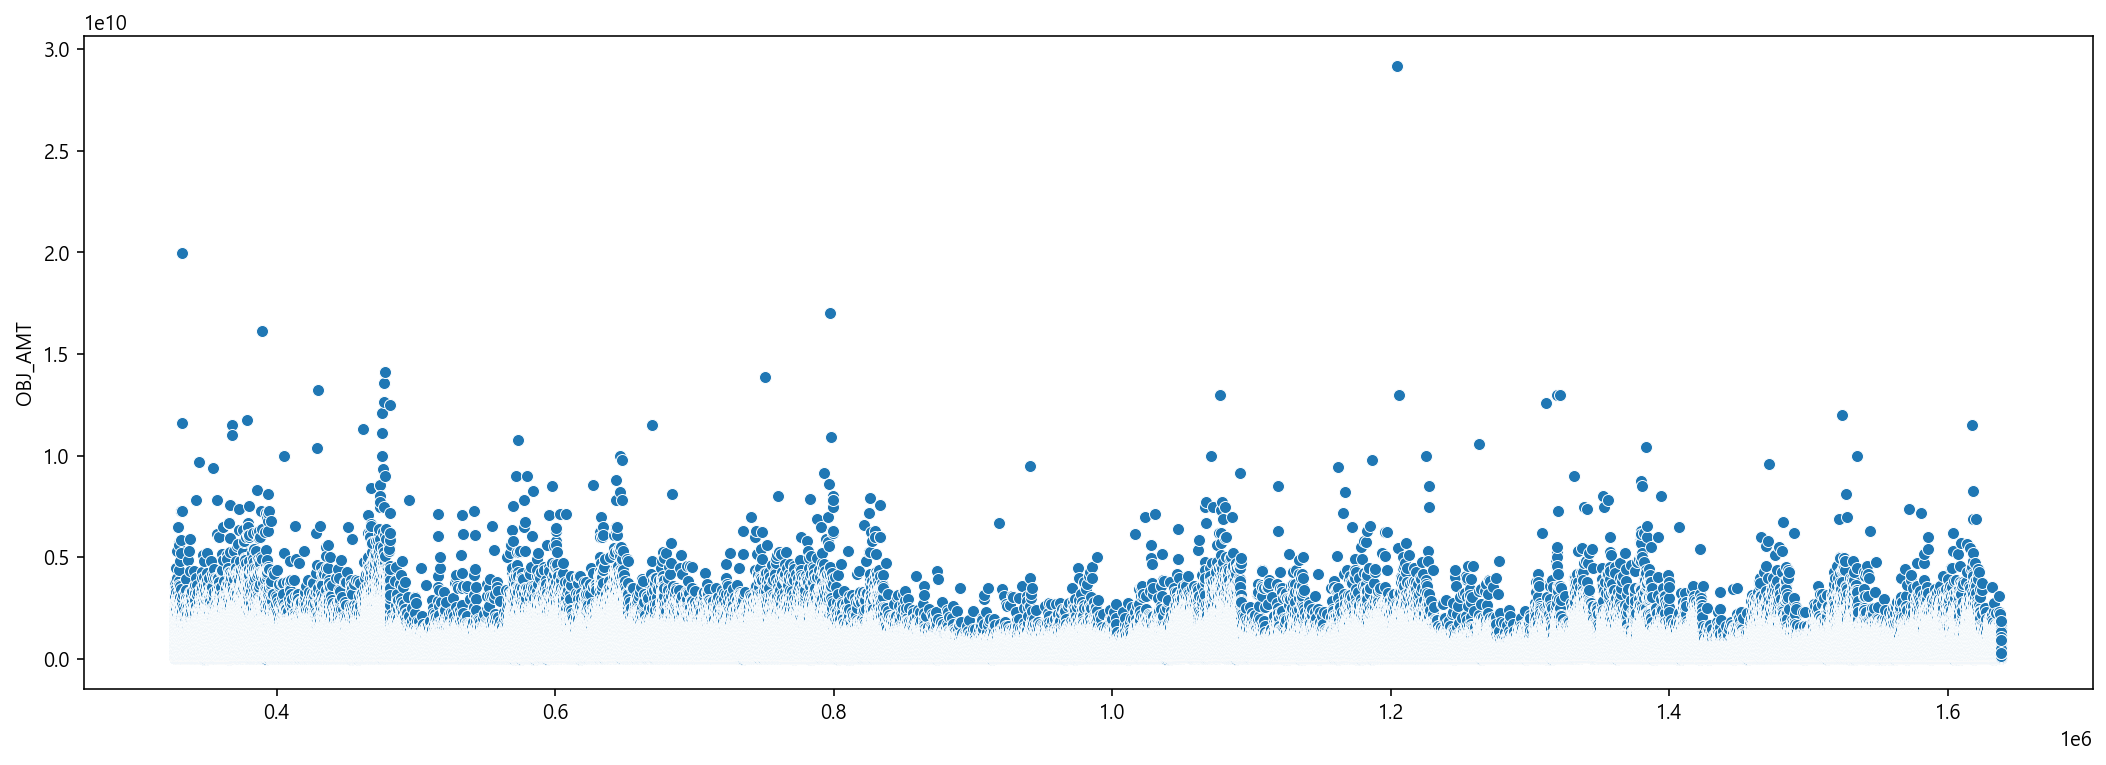

In [ ]:
# 이상치 확인
plt.figure(figsize=(18,6))
sns.scatterplot(x=train.index, y= train['OBJ_AMT']);

In [ ]:
# low_sales = train.OBJ_AMT.quantile(0.01)
# high_sales = train.OBJ_AMT.quantile(0.98)

# train = train[(train.OBJ_AMT >= low_sales) & (train.OBJ_AMT <= high_sales)]
# plt.figure(figsize=(18,6))

# sns.scatterplot(x=train.index, y=train['OBJ_AMT'])
# plt.xticks(rotation=90)

In [ ]:
train

,RTMS_ID,LAND_CD,SGG_CD,SGG_NM,BJDONG10_CD,BJDONG_NM,ACC_YEAR,JOB_GBN,JOB_GBN_NM,OBJ_SEQNO,TOT_AREA,BLDG_AREA,RIGHT_GBN,FLR_INFO,BLDG_MUSE_CD,BLDG_MUSE_NM,OBJ_AMT,BLDG_NM,BUILD_YEAR,SGDONG_NM
326967,11380-2018-4-0010781-1,1138010400104460011,11380,은평구,1138010400,갈현동,2018,4,신고,1,23.61,31.06,0,1.0,2002,연립주택,80000000,(446-11),1987.0,은평구 갈현동
326968,11545-2018-4-0005964-1,1154510200103800014,11545,금천구,1154510200,독산동,2018,4,신고,1,28.67,48.54,0,3.0,2002,연립주택,180000000,금호타운(380-14),2001.0,금천구 독산동
326969,11380-2018-4-0010780-1,1138010200101410111,11380,은평구,1138010200,녹번동,2018,4,신고,1,21.22,31.56,0,-1.0,2002,연립주택,67000000,신진빌라(141-111),1991.0,은평구 녹번동
326970,11230-2018-4-0009724-1,1123010600103360000,11230,동대문구,1123010600,장안동,2018,4,신고,1,NaN,84.87,0,11.0,2001,아파트,600000000,장안현대홈타운(336),2003.0,동대문구 장안동
326971,11380-2018-4-0010779-1,1138010300102300003,11380,은평구,1138010300,불광동,2018,4,신고,1,NaN,56.40,0,8.0,2001,아파트,285900000,대암아파트,1997.0,은평구 불광동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638402,11470-2010-4-0002601-1,1147010300101230031,11470,양천구,1147010300,신월동,2010,4,신고,1,22.04,38.02,0,3.0,2002,연립주택,149000000,SK그랑빌5차,2009.0,양천구 신월동
1638403,11470-2010-4-0002612-1,1147010300110250000,11470,양천구,1147010300,신월동,2010,4,신고,1,NaN,81.75,0,2.0,2001,아파트,299500000,탑건진선미,2004.0,양천구 신월동
1638404,11470-2010-4-0002609-1,1147010200109010000,11470,양천구,1147010200,목동,2010,4,신고,1,NaN,47.52,0,5.0,2001,아파트,515000000,목동신시가지1,1985.0,양천구 목동
1638405,11470-2010-4-0002607-1,1147010100113140000,11470,양천구,1147010100,신정동,2010,4,신고,1,NaN,144.38,0,3.0,2001,아파트,952400000,중앙하이츠,2010.0,양천구 신정동


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311440 entries, 326967 to 1638406
Data columns (total 20 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   RTMS_ID       1311440 non-null  object 
 1   LAND_CD       1311440 non-null  object 
 2   SGG_CD        1311440 non-null  int64  
 3   SGG_NM        1311440 non-null  object 
 4   BJDONG10_CD   1311440 non-null  int64  
 5   BJDONG_NM     1311440 non-null  object 
 6   ACC_YEAR      1311440 non-null  int64  
 7   JOB_GBN       1311440 non-null  int64  
 8   JOB_GBN_NM    1311440 non-null  object 
 9   OBJ_SEQNO     1311440 non-null  int64  
 10  TOT_AREA      599522 non-null   float64
 11  BLDG_AREA     1311440 non-null  float64
 12  RIGHT_GBN     1311439 non-null  object 
 13  FLR_INFO      1205677 non-null  float64
 14  BLDG_MUSE_CD  1311440 non-null  int64  
 15  BLDG_MUSE_NM  1311440 non-null  object 
 16  OBJ_AMT       1311440 non-null  int64  
 17  BLDG_NM       1205677 

In [ ]:
def wrangle(df):
    df = df.copy()
    
    # 서울시 아파트에 대해서만 
    df = df[df['BLDG_MUSE_NM'] == '아파트']
    
    df['FLR_INFO'] = df['FLR_INFO'].apply(pd.to_numeric)
    df['TOT_AREA'] = df['TOT_AREA'].apply(pd.to_numeric)
    
    df['ACC_YEAR'] = df['ACC_YEAR'].astype('int64')
    df['SGG_NM'] = df['SGG_NM'].astype('category')
    
    # 연면적 추가
    df['YEON_AREA'] = df['FLR_INFO'] * df['BLDG_AREA']  
    # 이상치 제거
    low_sales = df.OBJ_AMT.quantile(0.01)
    high_sales = df.OBJ_AMT.quantile(0.98)
    df = df[(df.OBJ_AMT >= low_sales) & (df.OBJ_AMT <= high_sales)]

    # 높은 카디널리티는 삭제
    df = df.drop(columns=['RTMS_ID', 'LAND_CD', 'BJDONG_NM', 'BLDG_NM', 'SGDONG_NM'], axis=1)
    
    # 가격과 관련이 없는 컬럼 삭제
    df = df.drop(columns=['TOT_AREA', 'SGG_CD', 'RIGHT_GBN', 'BLDG_MUSE_NM', 'BLDG_MUSE_CD', 'JOB_GBN', 'JOB_GBN_NM'], axis=1)
    
    df = df.reset_index(drop=True)
    
    return df

train = wrangle(train)
val = wrangle(test)
test = wrangle(test)

In [ ]:
train.shape, val.shape, test.shape

((732440, 9), (94482, 9), (94482, 9))

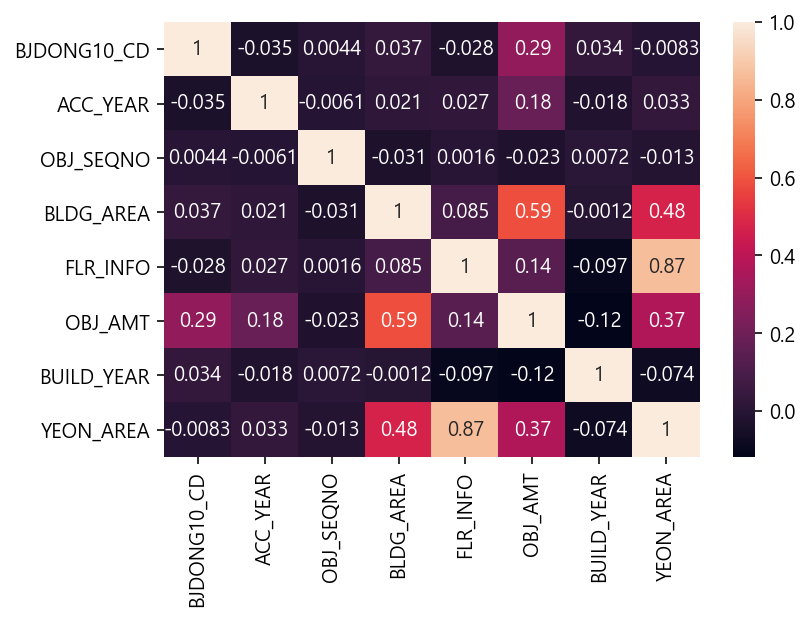

In [ ]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show();

# 모델 설계

1) 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?

2) 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?

3) 최종 모델에 관해 설명하세요.

**기준모델**

예측을 수행하고 평가하기 전에 합리적인 측정 기준을 설정해야 합니다. 서울시 아파트 사례의 기본 예측은 연간 서울시 집값이 될 것입니다. 즉, 기준선은 대상 데이터 세트(y_train)의 평균 집값을 단순히 예측한 경우 발생할 수 있는 오류입니다.

In [ ]:
predict = train['OBJ_AMT'].mean()
errors = predict - train['OBJ_AMT']

In [ ]:
errors

0        -1.023939e+08
1         2.117061e+08
2        -2.120939e+08
3        -9.139386e+07
4        -1.841339e+08
              ...     
732435    2.876061e+08
732436    1.981061e+08
732437   -1.739386e+07
732438   -4.547939e+08
732439    2.086061e+08
Name: OBJ_AMT, Length: 732440, dtype: float64

In [ ]:
base_mae = errors.abs().mean()
base_mae 

202072233.99531874

In [ ]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${base_mae:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $497,606,136이며 절대평균에러가 $202,072,234임을 확인할 수 있습니다.


**target값 분류**

In [ ]:
target = 'OBJ_AMT'
features = train.columns.drop('OBJ_AMT')

X_train = train[features]
y_train = np.log1p(train[target])
X_val = val[features]
y_val = np.log1p(val[target])
X_test = test[features]
y_test = np.log1p(test[target])

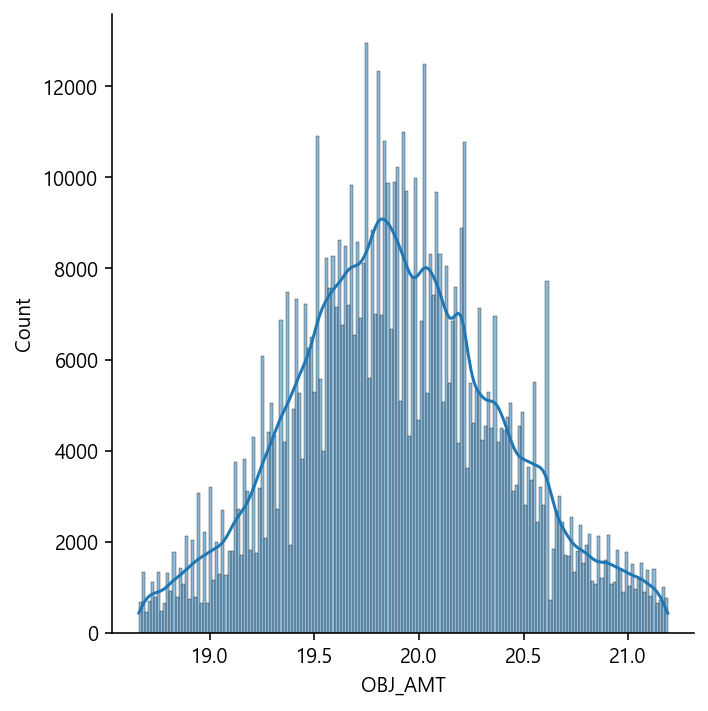

In [ ]:
# right skward 분포를 띄고 있어 log를 취해줬다.

import seaborn as sns

sns.displot(y_train, kde=True)

# 3가지 모델 비교

## Linear

In [ ]:
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest

lm = make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    LinearRegression()
)

lm.fit(X_train, y_train)
print('R^2', lm.score(X_val, y_val))

R^2 0.27068605286040803


## Ensemble

- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rm= make_pipeline(
    TargetEncoder(),
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42, n_jobs=-1)
)


In [ ]:
rm.fit(X_train, y_train)
rm.score(X_val, y_val)

0.5990404656036722

## XGBoost 모델

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

boosting = XGBRegressor(
    n_estimators=200,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:15.52370	validation_1-rmse:15.98902
[1]	validation_0-rmse:12.42006	validation_1-rmse:12.87053
[2]	validation_0-rmse:9.93728	validation_1-rmse:10.37956
[3]	validation_0-rmse:7.95131	validation_1-rmse:8.38627
[4]	validation_0-rmse:6.36271	validation_1-rmse:6.79276
[5]	validation_0-rmse:5.09199	validation_1-rmse:5.51505
[6]	validation_0-rmse:4.07574	validation_1-rmse:4.49233
[7]	validation_0-rmse:3.26296	validation_1-rmse:3.67263
[8]	validation_0-rmse:2.61329	validation_1-rmse:3.00680
[9]	validation_0-rmse:2.09408	validation_1-rmse:2.48368
[10]	validation_0-rmse:1.67939	validation_1-rmse:2.06171
[11]	validation_0-rmse:1.34846	validation_1-rmse:1.72348
[12]	validation_0-rmse:1.08469	validation_1-rmse:1.45527
[13]	validation_0-rmse:0.87488	validation_1-rmse:1.23921
[14]	validation_0-rmse:0.70857	validation_1-rmse:1.06899
[15]	validation_0-rmse:0.57698	validation_1-rmse:0.92766
[16]	validation_0-rmse:0.47386	validation_1-rmse:0.82140
[17]	validation_0-rmse:0.39348	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))

R^2 0.5581005594984417


## 평가 지표 계산 후 베이스 라인과 비교

In [ ]:
y_pred = [y_train.mean()] * len(y_train)

print('Baseline MAE:', round(mean_absolute_error(y_train, y_pred), 3))

Baseline MAE: 0.403


In [ ]:
from sklearn.metrics import mean_absolute_error


print('Linear Regression Test MAE: ', round(mean_absolute_error(y_val, lm.predict(X_val)), 3))

print('Random Forest Regression Test MAE: ', round(mean_absolute_error(y_val, rm.predict(X_val)), 3))

print('Gradiant Boost Regression Test MAE: ', round(mean_absolute_error(y_val, y_pred), 3))

Linear Regression Test MAE:  0.395
Random Forest Regression Test MAE:  0.313
Gradiant Boost Regression Test MAE:  0.325


In [ ]:
lm_y_pred = lm.predict(X_val)

errors = abs(lm_y_pred - y_val)
mape = 100 * (errors /y_train)
accuracy = 100 - np.mean(mape)
print('Linear Regressoion Model Prediction Accuracy:', accuracy,'%.')

Linear Regressoion Model Prediction Accuracy: 98.0292111797503 %.


In [ ]:
rf_y_pred = rm.predict(X_val)

errors = abs(rf_y_pred - y_val)
mape = 100 * (errors /y_train)
accuracy = 100 - np.mean(mape)
print('Random Frest Regressoion Model Prediction Accuracy:', round(accuracy, 2),'%.')

Random Frest Regressoion Model Prediction Accuracy: 98.44 %.


In [ ]:
y_pred = boosting.predict(X_val_encoded)

errors = abs(y_pred - y_val)
mape = 100 * (errors /y_train)
accuracy = 100 - np.mean(mape)
print('Gradiant Boost Regression Model Prediction Accuracy:', round(accuracy, 2),'%.')

Gradiant Boost Regression Model Prediction Accuracy: 98.38 %.


Random Frest Regressoion 으로 모델을 만들었을 때의 정확도가  98.44 %가 됩니다. 3가지 회귀 모델 중 가장 높은 성능을 가지고 있다.

## Hyperparameter tuning

RandomForestRegressor model로 Radom Search CV best 파라미터 찾기

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV


pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'randomforestregressor__n_estimators': randint(25, 100), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)


In [ ]:
clf.fit(X_train, y_train); 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.0min finished


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('교차 검증 된 평균 점수: ', -clf.best_score_)

In [ ]:
pipe = clf.best_estimator_

In [ ]:
y_test_best_pred = pipe.predict(X_test)
print('Random Forest Regression Test MAE: ', round(mean_absolute_error(y_test, y_test_best_pred), 3))
print('Test R^2', r2_score(y_test, y_test_best_pred))

Random Forest Regression Test MAE:  0.33
Test R^2 0.5499397297571766


In [ ]:
y_test_pred = rm.predict(X_test)
print('Random Forest Regression Test MAE: ', round(mean_absolute_error(y_test, y_test_pred), 3))
print('Test R^2', r2_score(y_test, y_test_pred))


Random Forest Regression Test MAE:  0.313
Test R^2 0.5990404656036723


최적의 하이퍼파라미터를 구했지만 H/W적인 문제로 시간이 오래걸려 많이 테스트해보지 못했다. RandomForest 0.5990의 값이 더 잘 나왔습니다.

## Croos Validation 을 통해 일반화될 가능성 체크

In [ ]:
from sklearn.model_selection import validation_curve

depth = range(1, 15, 2)

ts, vs = validation_curve(
    pipe, X_train, y_train
    , param_name='randomforestregressor__max_depth'
    , param_range=depth, scoring='neg_mean_absolute_error'
    , cv=3
    , n_jobs=-1
)


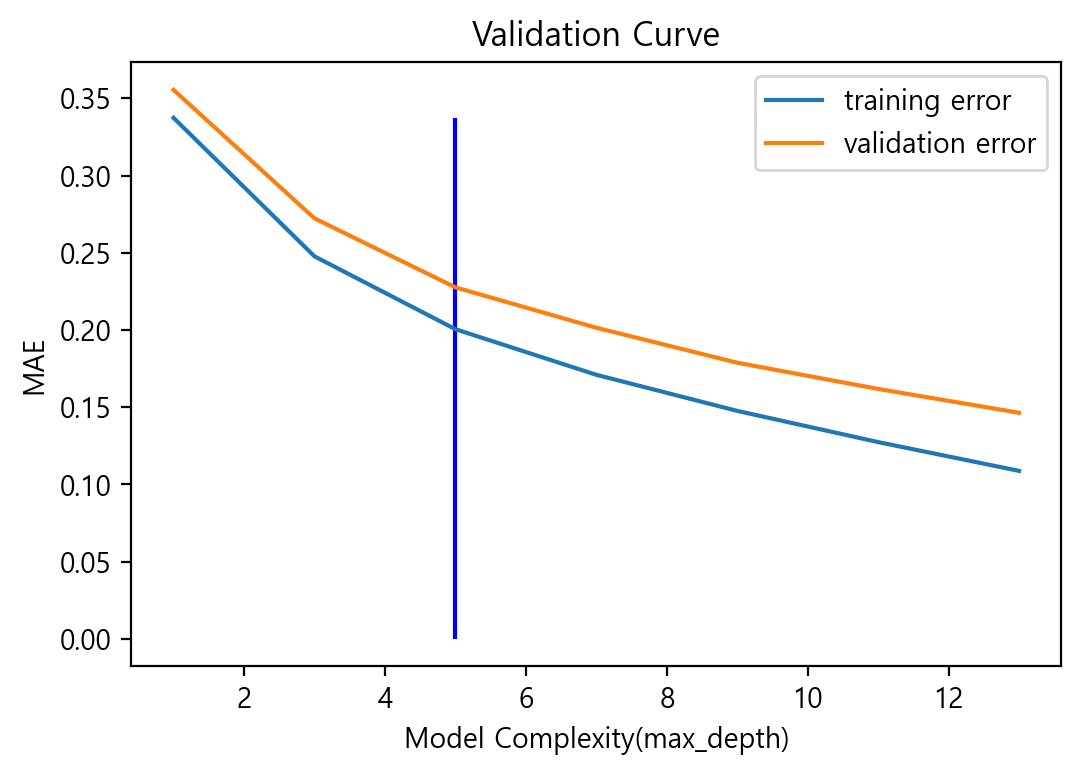

In [ ]:
train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(5,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

## Permutaition 을 통한 Feature 선택

In [ ]:
pipe

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['SGG_NM'], min_samples_leaf=3,
                               smoothing=60.0)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20,
                                       max_features=0.3647391876981543,
                                       n_estimators=45, random_state=2))])

In [ ]:
model_rf = pipe['randomforestregressor']
ecd = pipe['targetencoder']

In [ ]:
pipe.named_steps

{'targetencoder': TargetEncoder(cols=['SGG_NM'], min_samples_leaf=3, smoothing=60.0),
 'simpleimputer': SimpleImputer(strategy='most_frequent'),
 'randomforestregressor': RandomForestRegressor(max_depth=20, max_features=0.3647391876981543,
                       n_estimators=45, random_state=2)}

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(cols=['SGG_NM'], min_samples_leaf=4, smoothing=50.0), SimpleImputer(strategy='most_frequent'))),
    ('rf', RandomForestRegressor(max_depth=20, max_features=0.5366197983107657,
                       n_estimators=33, random_state=2, n_jobs=-1)) 
])

In [ ]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.5867701140757624


In [ ]:
pipe.named_steps

{'preprocessing': Pipeline(steps=[('targetencoder',
                  TargetEncoder(cols=['SGG_NM'], min_samples_leaf=4,
                                smoothing=50.0)),
                 ('simpleimputer', SimpleImputer(strategy='most_frequent'))]),
 'rf': RandomForestRegressor(max_depth=20, max_features=0.5366197983107657,
                       n_estimators=33, n_jobs=-1, random_state=2)}

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=X_val.columns.tolist() # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1584 ± 0.0014,BLDG_AREA
0.1233 ± 0.0011,SGG_NM
0.0839 ± 0.0010,BUILD_YEAR
0.0525 ± 0.0004,BJDONG10_CD
0.0084 ± 0.0003,YEON_AREA
0.0024 ± 0.0001,FLR_INFO
0.0000 ± 0.0000,ACC_YEAR
-0.0000 ± 0.0000,OBJ_SEQNO


특성 중요도를 보면 법정동코드, 건물면적, 건축년도 등이 모델 성능과 관련이 있는 특성들로 보입니다. 전체 특성이 얼마 되지 않아 삭제를 하거나 하지는 않겠습니다.

**건물면적, 시군이름, 건축년도, 법정동코드 순으로 관련 있다는 것은 신축건물이면서, 지역별로 아파트의 가격에 영향을 많이 미친다고 볼 수 있습니다.** 이후에 모델을 만들고 모델 동작 방식을 보면서 중요성을 한번 더 짚어보겠습니다.

# 최종 모델 적용

Baseline MAE: 0.403 이었습니다. 모델을 적용한 결과 MAE가 낮아 지므로 성능이 더 좋은것을 볼 수있습니다.

In [ ]:
print('Validation MAE:', mean_absolute_error(y_val, pipe.predict(X_val)))

Validation MAE: 0.31728359756263774


RadomSearchCV로 구한 최적의  하이퍼파라미터를 적용한 clf 모델을 사용해서 test 데이터를 예측

In [ ]:
print('Validation MAE:', mean_absolute_error(y_test, pipe.predict(X_test)))

y_test_pred = pipe.predict(X_test)
print('Test R^2', r2_score(y_test, y_test_pred))

Validation MAE: 0.3172835975626377
Test R^2 0.5867701140757626


# 머신러닝 모델 해석

1)모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?

2) 어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?

##  SHAP, PDP 등을 통해서 모델이 관측치를 어떤 특성을 활용했거나, 어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석

### PDP를 통한 모델 Interpreting 

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'BLDG_AREA'

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features = X_val.columns,
    feature = feature
)

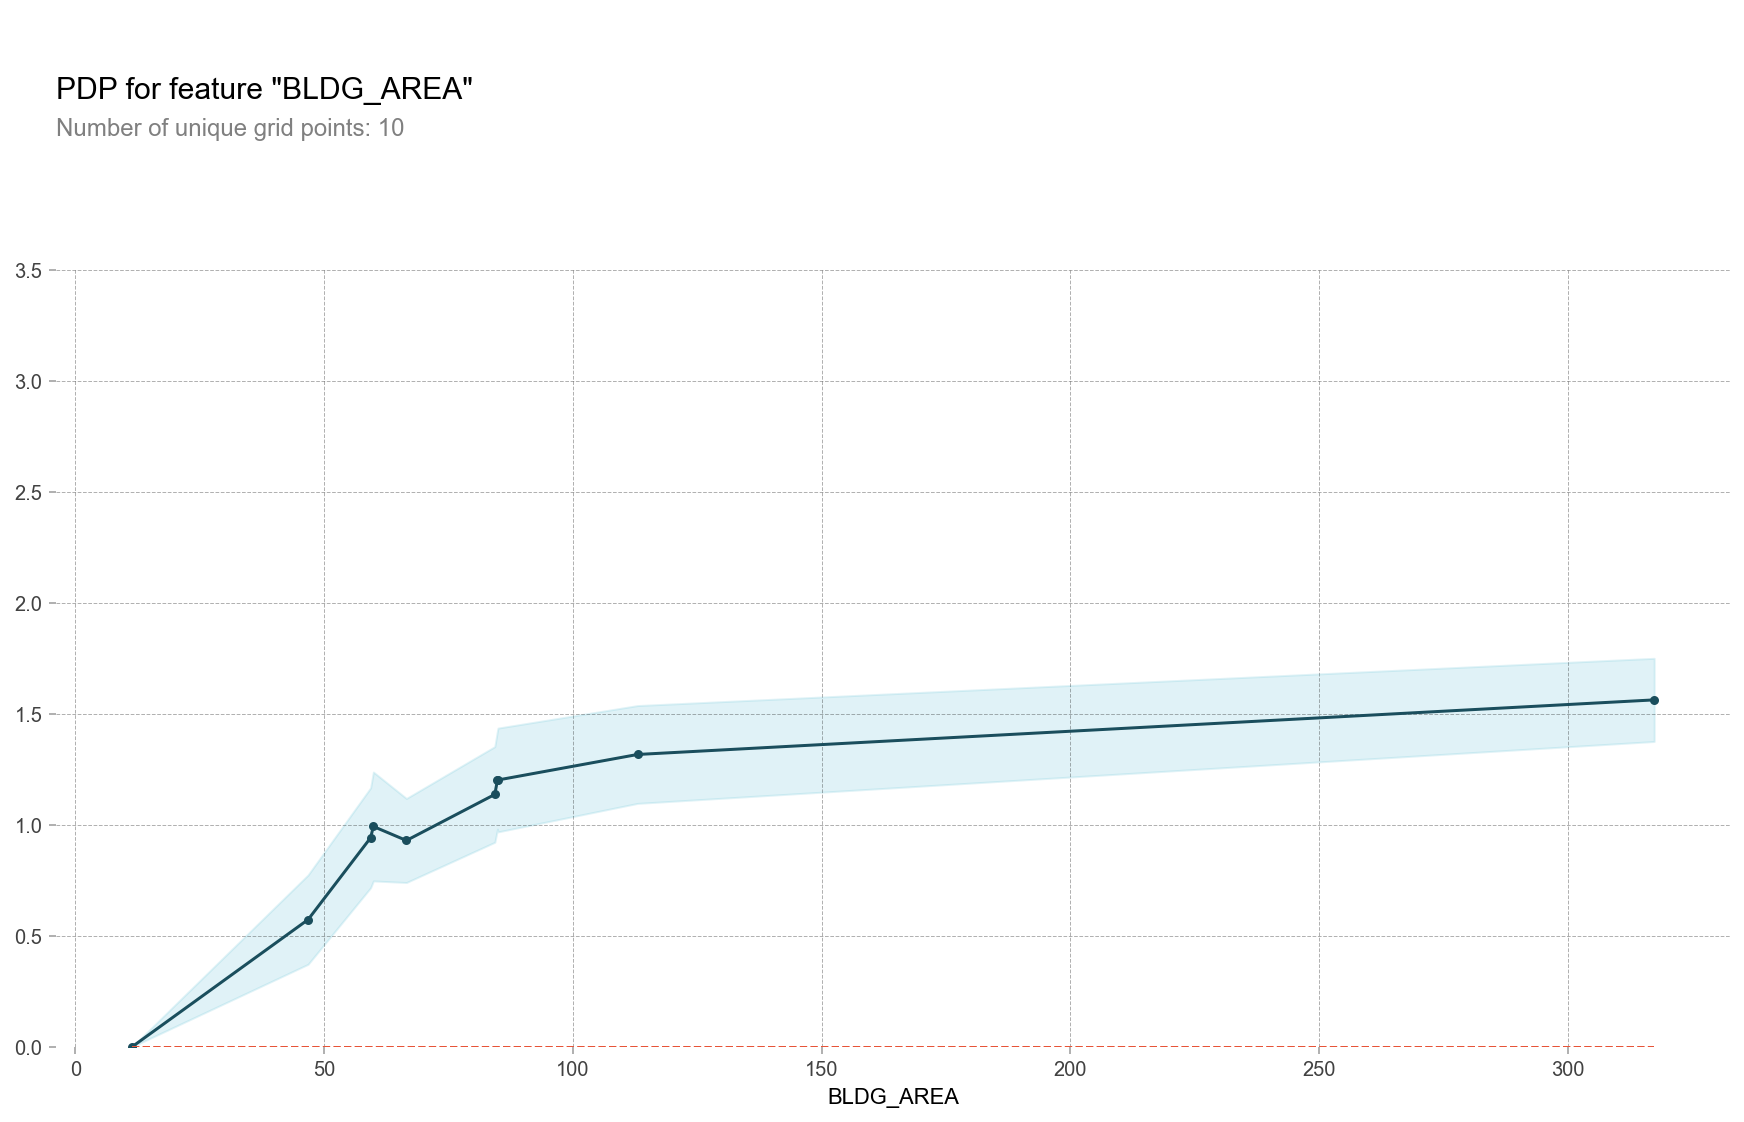

In [ ]:
feature = 'BLDG_AREA'

pdp_plot(isolated, feature_name=feature);

### SHAP를 통한 모델 Interpreting 

In [ ]:
pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('targetencoder',
                                  TargetEncoder(cols=['SGG_NM'],
                                                min_samples_leaf=4,
                                                smoothing=50.0)),
                                 ('simpleimputer',
                                  SimpleImputer(strategy='most_frequent'))])),
                ('rf',
                 RandomForestRegressor(max_depth=20,
                                       max_features=0.5366197983107657,
                                       n_estimators=33, n_jobs=-1,
                                       random_state=2))])

In [ ]:
enc = pipe['preprocessing']['targetencoder']

In [ ]:
X_target_encoded = enc.fit_transform(X_val, y_val)
row = X_target_encoded.iloc[:100]
row

,SGG_NM,BJDONG10_CD,ACC_YEAR,OBJ_SEQNO,BLDG_AREA,FLR_INFO,BUILD_YEAR,YEON_AREA
0,20.087829,1130510200,2021,1,49.94,7.0,1991.0,349.58
1,20.406312,1141011100,2021,1,84.96,10.0,2001.0,849.60
2,20.406312,1141011100,2021,1,59.94,11.0,2002.0,659.34
3,20.406312,1141012000,2021,1,59.98,4.0,2015.0,239.92
4,20.406312,1141010900,2021,1,84.87,17.0,1998.0,1442.79
...,...,...,...,...,...,...,...,...
95,19.934357,1154510300,2021,1,114.84,11.0,2004.0,1263.24
96,20.406312,1141012000,2021,1,84.97,18.0,2015.0,1529.46
97,20.406312,1141011000,2021,1,59.96,3.0,1999.0,179.88
98,19.934357,1154510300,2021,1,84.99,12.0,2000.0,1019.88


In [ ]:
row_one = X_target_encoded.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row_one

,SGG_NM,BJDONG10_CD,ACC_YEAR,OBJ_SEQNO,BLDG_AREA,FLR_INFO,BUILD_YEAR,YEON_AREA
1,20.406312,1141011100,2021,1,84.96,10.0,2001.0,849.6


In [ ]:
# 실제 집값
y_test.iloc[[1]]  # 서대문구	1141011100	홍제동

1    20.560747
Name: OBJ_AMT, dtype: float64

In [ ]:
best_pipe = clf.best_estimator_
best_pipe

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['SGG_NM'], min_samples_leaf=3,
                               smoothing=60.0)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20,
                                       max_features=0.3647391876981543,
                                       n_estimators=45, random_state=2))])

In [ ]:
# 모델 예측값
best_pipe.predict(row_one)

array([20.21498103])

In [ ]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(best_pipe['randomforestregressor'])
shap_values = explainer.shap_values(row_one)


shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row_one
)

In [ ]:
np.exp(20.57) # 모델로 예측한 집 가격

857901629.545542

서대문구 홍제동의 집값을 예측한 결과 857901629원 으로 서울시 지역 서대문구, 거래 신고년도, 건축 면적이 특성이 집값을 증가시켰다.

In [ ]:
row_gangnam = X_target_encoded[X_target_encoded.BJDONG10_CD == 1168011200].iloc[[1]]


shap.initjs()

explainer = shap.TreeExplainer(best_pipe['randomforestregressor'])
shap_values = explainer.shap_values(row_gangnam)


shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row_gangnam
)

In [ ]:
np.exp(20.62)

901887186.6751202

강남구의 집값을 예측한 결과 901887186원 으로 서울시 지역 강남구, 거래 신고년도, 건축 면적이 특성이 집값을 증가시켰다.

SGG_NM, ACC_YEAR, BULDG_AREA 가 집값을 예측하는 중요한 요소이다. 서울시 아파트는 지역에따라(시군) 가장 영향을 많이 미친다. 

In [ ]:
X_target_encoded = enc.fit_transform(X_val, y_val)
row = X_target_encoded.iloc[:20]
row

,SGG_NM,BJDONG10_CD,ACC_YEAR,OBJ_SEQNO,BLDG_AREA,FLR_INFO,BUILD_YEAR,YEON_AREA
0,20.087829,1130510200,2021,1,49.94,7.0,1991.0,349.58
1,20.406312,1141011100,2021,1,84.96,10.0,2001.0,849.60
2,20.406312,1141011100,2021,1,59.94,11.0,2002.0,659.34
3,20.406312,1141012000,2021,1,59.98,4.0,2015.0,239.92
4,20.406312,1141010900,2021,1,84.87,17.0,1998.0,1442.79
5,20.406312,1141011700,2021,1,63.60,5.0,1978.0,318.00
6,20.406312,1141011100,2021,1,84.79,8.0,2016.0,678.32
7,20.406312,1141011100,2021,1,84.95,6.0,2006.0,509.70
8,20.406312,1141011700,2021,1,77.41,6.0,2004.0,464.46
9,19.934357,1154510300,2021,1,49.75,12.0,1981.0,597.00


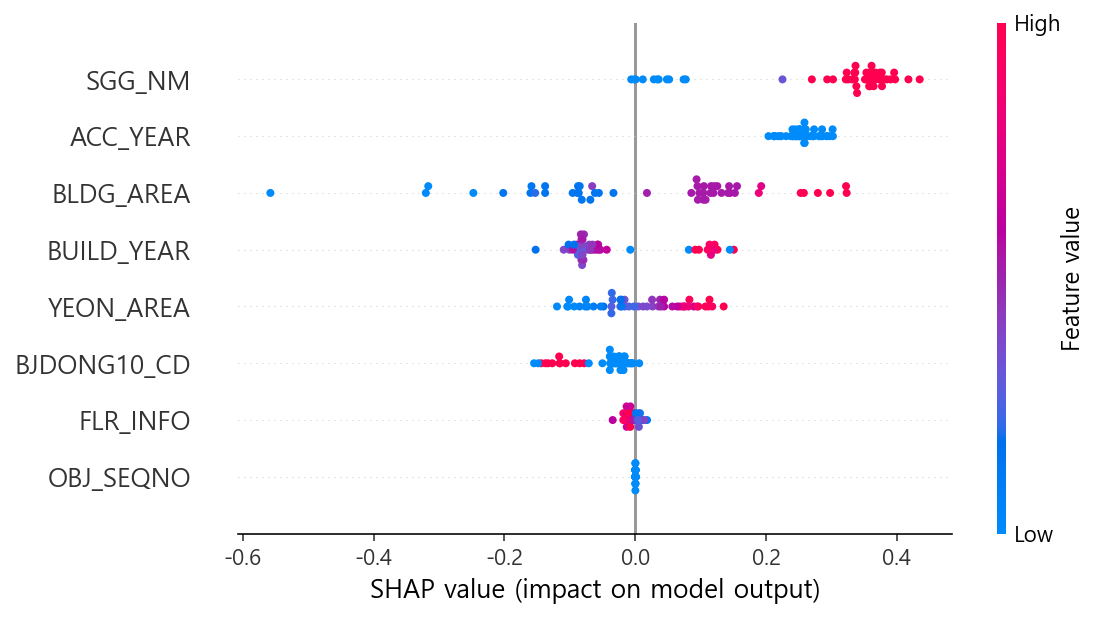

In [ ]:
row = X_target_encoded.iloc[:50]
shap_values = explainer.shap_values(row)
shap.summary_plot(shap_values, row)

summary plot에서 특성값과 예측에 미치는 영향 사이의 관계 지표를 볼 수 있다. 서울시의 시군이름은 집값의 가장 긍정적인 역할을 한다. 

최종모델 점수

Validation MAE: 0.3172835975626377

Test R^2 0.5867701140757626

10년간의 데이터로 2020년 이후의 집 값을 꽤 잘 예측한 것으로 보입니다. 정부의 규제나 다른 외적인 요인들을 추가한다면 더 좋은 모델을 만들어 앞으로의 집값예측에 도움이 될 수 있는 자료가 될 것입니다.

감사합니다.